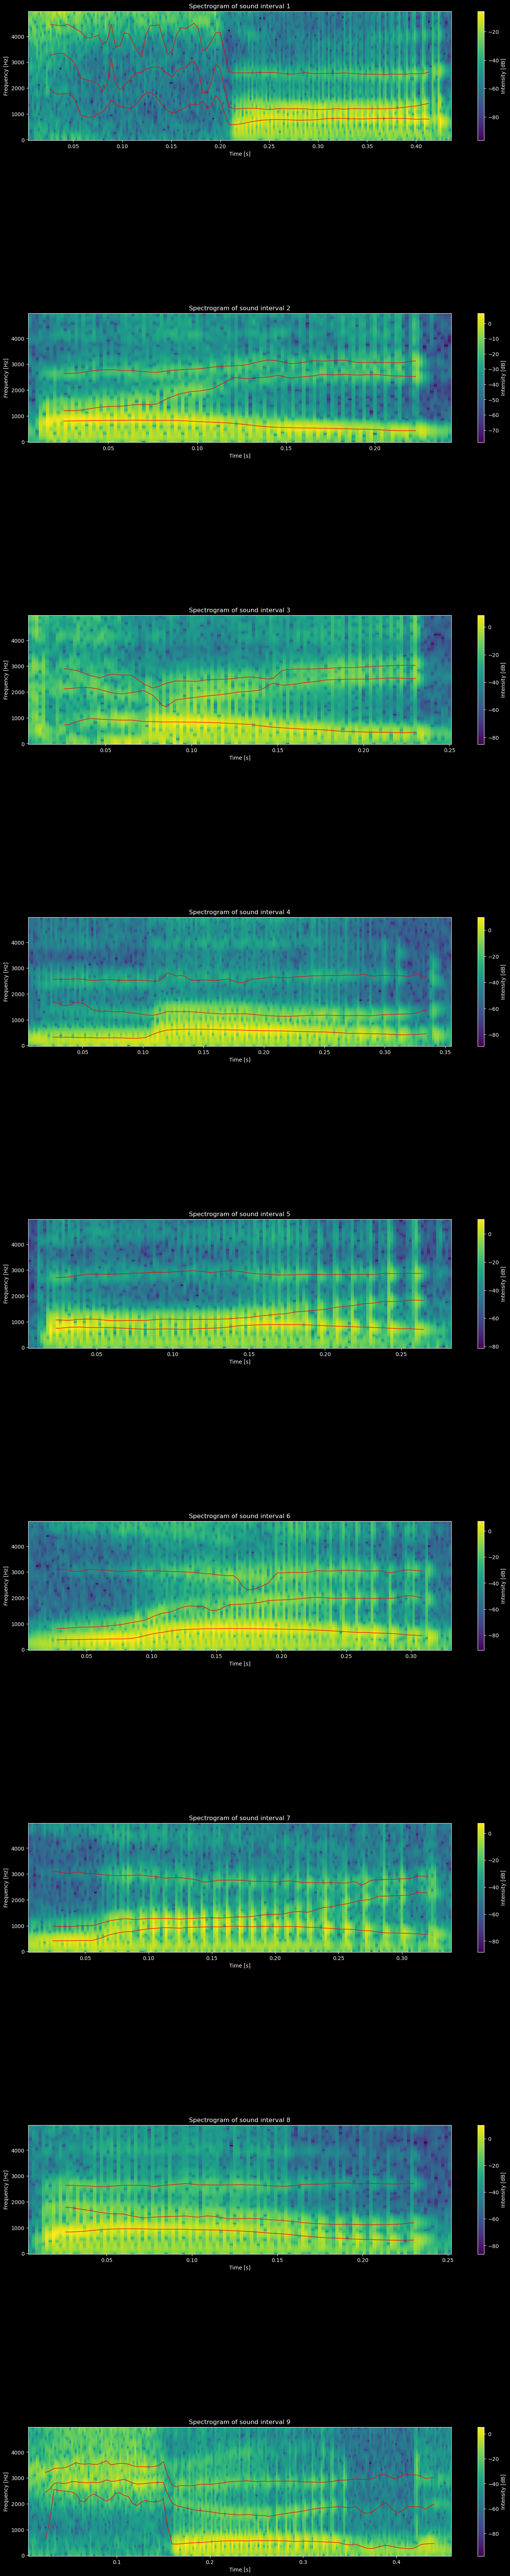

In [13]:
import parselmouth
from parselmouth.praat import call
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file using Parselmouth
sound = parselmouth.Sound("../data/test.wav")

# Create TextGrid with silences
grid = call(sound, "To TextGrid (silences)", 100, 0, -25, 0.1, 0.1, "silent", "sounding")

# Extract intervals from TextGrid
intervals = call(grid, "Get number of intervals", 1)

# Create a figure with subplots for each sounding interval
plt.figure(figsize=(15, 4 * intervals))

count = 0
for i in range(1, intervals + 1):
    label = call(grid, "Get label of interval", 1, i)
    if label == "sounding":
        # Get interval boundaries
        start = call(grid, "Get start time of interval", 1, i)
        end = call(grid, "Get end time of interval", 1, i)

        # Extract part of the sound
        sound_part = sound.extract_part(from_time=start, to_time=end)

        # Create spectrogram
        spectrogram = sound_part.to_spectrogram()
        X, Y = spectrogram.x_grid(), spectrogram.y_grid()
        sg_db = 10 * np.log10(spectrogram.values)

        # Get formants
        formants = sound_part.to_formant_burg()

        # Plot spectrogram
        count += 1
        plt.subplot(intervals, 1, i)
        plt.pcolormesh(X, Y, sg_db, shading="auto")

        # Plot formant tracks
        for formant_num in range(1, 4):  # Plot first 4 formants
            formant_values = []
            times = []
            for t in np.linspace(0, sound_part.duration, 100):
                try:
                    formant_value = formants.get_value_at_time(formant_num, t)
                    if formant_value:  # Only add if formant value exists
                        formant_values.append(formant_value)
                        times.append(t)
                except:
                    continue
            if formant_values:  # Only plot if we have values
                plt.plot(times, formant_values, "r-", linewidth=1)

        plt.ylabel("Frequency [Hz]")
        plt.xlabel("Time [s]")
        plt.title(f"Spectrogram of sound interval {count}")
        plt.colorbar(label="Intensity [dB]")

plt.tight_layout()
plt.show()